# Storytelling Data Visualization on Exchange Rates

In this project I'll go to combine the skills I learned before. In the precourse we focused on explanatory data visulization. That means that I create graphs for others to inform, make point, or tell a story.
I learned:
- How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
- About the elements of a story and how to create storytelling data visualizations using Matplotlib.
- How to create visual patterns using Gestalt principles.
- How to guide the audience's attention with pre-attentive attributes.
- How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

Let's start and use these new skills!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

The information above shows that:

- The datafile has 5699 rows x 41 columns.
- These columns are conformed of a first date column in string type, followed by the conversion rate of different currencies - most of them in string type, some in float type.
- There are several null values across the different currencies conversion rates.

Before we start creating data visualizations, we'll need to do a bit of data cleaning.

# 1. Data Cleaning

My focus in the project will be on the exchange rate between the euro and the American dollar.

First I rename the '[US dollar ]' and 'Period\Unit:' columns to something easier to type — 'US_dollar' and 'Time', change the Time columns to a datetime data type and sort the values by Time in ascending order.

In [2]:
exchange_rates.rename(columns={'[US dollar ]' : 'US_dollar',
                              'Period\\Unit:' : 'Time'},
                     inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [3]:
#Isolate Time and US_dollar columns and assign to euro_to_dollar
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

#Inspection of the conversion rate values
euro_to_dollar['US_dollar'].value_counts().sort_index()

-         62
0.8252     1
0.8307     1
0.8324     1
0.8377     1
          ..
1.5919     1
1.5928     1
1.5931     1
1.5940     1
1.5990     1
Name: US_dollar, Length: 3528, dtype: int64

The inspection above shows that there are 62 data entries with a conversion rate of "-", which is not useful. Therefore, we'll drop the rows containing this value, and convert the 'US_dollar' column to a float data type.

In [4]:
#Dropping all the rows where the '-' character appears in the US_dollar column
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

#Convert 'US_dollar' to float type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

# 2. Exploratory data analysis

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

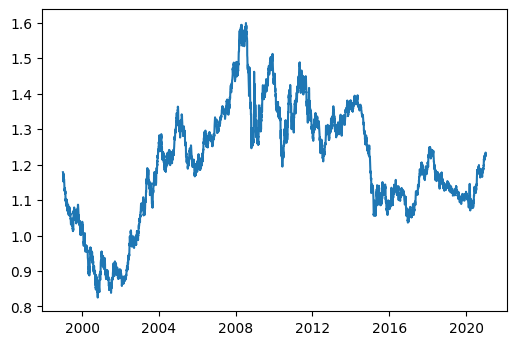

In [5]:
plt.plot(euro_to_dollar['Time'],
        euro_to_dollar['US_dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

To understand how a rolling mean works, let's say we have ten values for ten consecutive days.

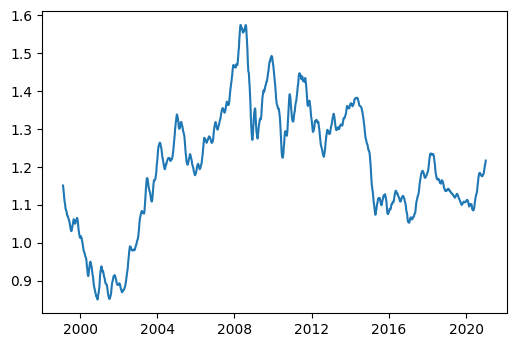

In [6]:
#Calculate the rolling means for the US_dollar
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

plt.plot(euro_to_dollar['Time'],
        euro_to_dollar['rolling_mean'])

plt.show()

# 3. Explanatory data analysis

On this screen, we're going to spend some time coming up with an idea for the graph we want to build. Our goal is to create a storytelling data visualization using the data we have.

To create a story, we need to arrange our data into a series of events that show change.

We're going to create a plot that shows comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021))

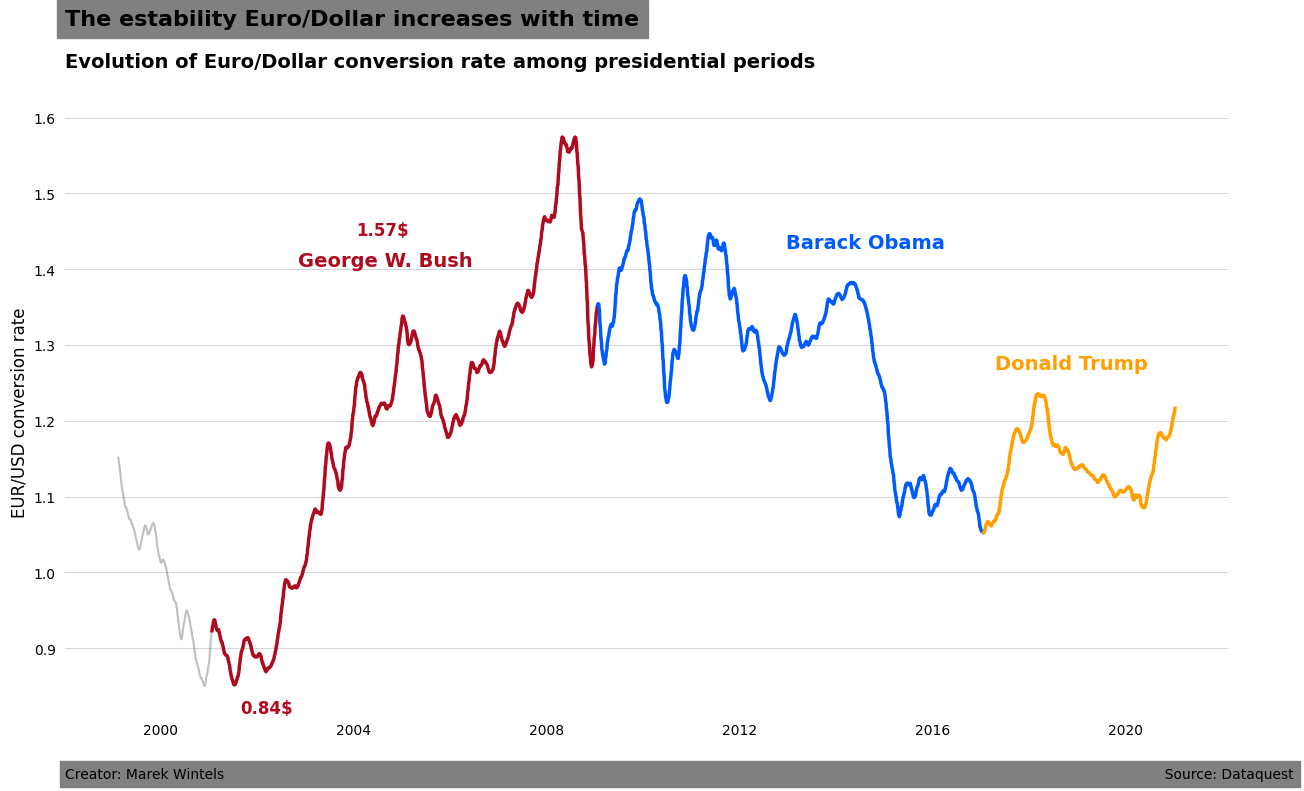

In [120]:
#Initiate the plot with the corresponding data
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(euro_to_dollar['Time'],
        euro_to_dollar['rolling_mean'],
        color='gray',
        alpha=.5)

#Hiding the ticks
ax.tick_params(left=False, bottom=False)

#Modify ticks labels
ax.grid(axis='y', visible=True, alpha=.5)
ax.set_ylabel('EUR/USD conversion rate', color='black', size=12)

#Removing all the four spines 
for location in ['left', 'right', 'bottom', 'top']:
 ax.spines[location].set_visible(False)

#Adding title, subtitle, creator and source
ax.text(0, 1.15, 'The estability Euro/Dollar increases with time', 
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes,
        backgroundcolor='grey',
        color='black',
        size=16, 
        weight='bold')

ax.text(0, 1.08,
        'Evolution of Euro/Dollar conversion rate among presidential periods', 
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes,
        color='black',
        size=14, 
        weight='bold')

ax.text(0, -0.1, 'Creator: Marek Wintels' + ' ' * 215 + 'Source: Dataquest',
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes,
        color='black',
        backgroundcolor='grey')

#Plot George W. Bush period (2001-01-20 – 2009-01-20) and label
ax.plot(euro_to_dollar['Time'][(euro_to_dollar['Time'] >= datetime.datetime(2001,1,20)) &
                              (euro_to_dollar['Time'] < datetime.datetime(2009,1,20))],
       euro_to_dollar['rolling_mean'][(euro_to_dollar['Time'] >= datetime.datetime(2001,1,20)) &
                                     (euro_to_dollar['Time'] < datetime.datetime(2009,1,20))],
       color='#af0b1e',
       linewidth=2.5)

ax.text(0.2, 0.75, 'George W. Bush',
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes,
        color='#af0b1e',
        size=14,
        weight='bold')

#Plot Barack Obama period (2009-01-20 – 2017-01-20) and label
ax.plot(euro_to_dollar['Time'][(euro_to_dollar['Time'] >= datetime.datetime(2009,1,20)) &
                               (euro_to_dollar['Time'] < datetime.datetime(2017,1,20))],
        euro_to_dollar['rolling_mean'][(euro_to_dollar['Time'] >= datetime.datetime(2009,1,20)) &
                                       (euro_to_dollar['Time'] < datetime.datetime(2017,1,20))],
        color='#005BFF',
        linewidth=2.5)

ax.text(0.62, 0.78, 'Barack Obama',
       horizontalalignment='left',
       verticalalignment='center',
       transform=ax.transAxes,
       color='#005BFF',
       size=14,
       weight='bold')

#Plot Donald Trump period (2017-01-20 – 2021-01-20) and label
ax.plot(euro_to_dollar['Time'][(euro_to_dollar['Time'] >= datetime.datetime(2017,1,20)) & 
                                (euro_to_dollar['Time'] < datetime.datetime(2021,1,20))],
        euro_to_dollar['rolling_mean'][(euro_to_dollar['Time'] >= datetime.datetime(2017,1,20)) & 
                                        (euro_to_dollar['Time'] < datetime.datetime(2021,1,20))],
        color='#FFA000',
        linewidth=2.5)

ax.text(0.8, 0.58, 'Donald Trump',
       horizontalalignment='left',
       verticalalignment='center',
        transform=ax.transAxes,
       color='#FFA000',
       size=14,
       weight='bold')


#Minimum and maximum values labels
ax.text(0.15, 0.01, '0.84$',
       horizontalalignment='left',
       verticalalignment='center',
       transform=ax.transAxes,
       color='#af0b1e',
       size=12,
       weight='bold')

ax.text(0.25, 0.8, '1.57$',
       horizontalalignment='left',
       verticalalignment='center',
       transform=ax.transAxes,
       color='#af0b1e',
       size=12,
       weight='bold')

plt.show()

That's it. A nice graph about the evolution of Euro/Dollar conversion rate among presidental periods.